# NLP (Natural Language Processing)

 - NLP is combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand.
 - We will work on bulding a spam detection filter using nltk library.

## Data

We'll be using a dataset from the UCI datasets (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).
The file we are using contains a collection of more than 5 thousand SMS phone messages.

In [1]:
import nltk

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [4]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [6]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

 - We find 2 categories of sms here, spam and ham. ham is a normal message and spam is what we want to filter out.
 - We also see these messages are tab seperated where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [8]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

 - Make a new column to detect the length of the text messages are:

In [11]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


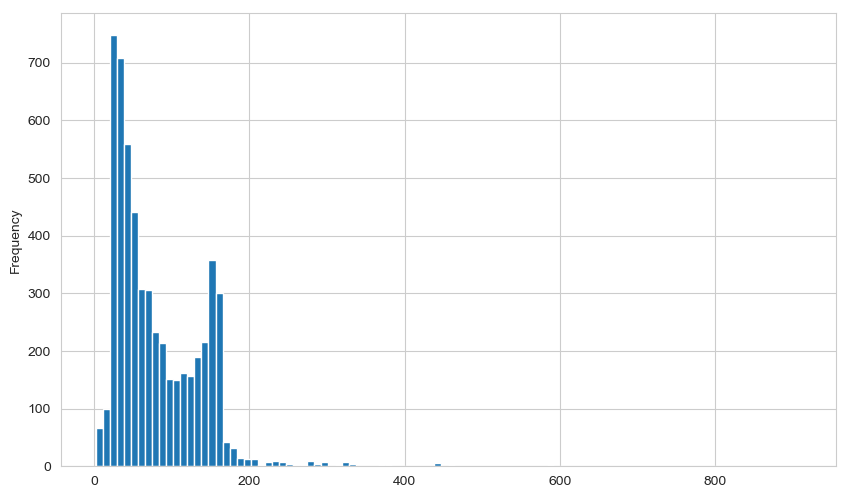

In [23]:
plt.figure(figsize=(10,6),dpi=100)
messages['length'].plot(bins=100, kind='hist') 

In [18]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

 - We find the max length of an sms was 910. That must be a long message.

In [22]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b15d6d8>,
      dtype=object)

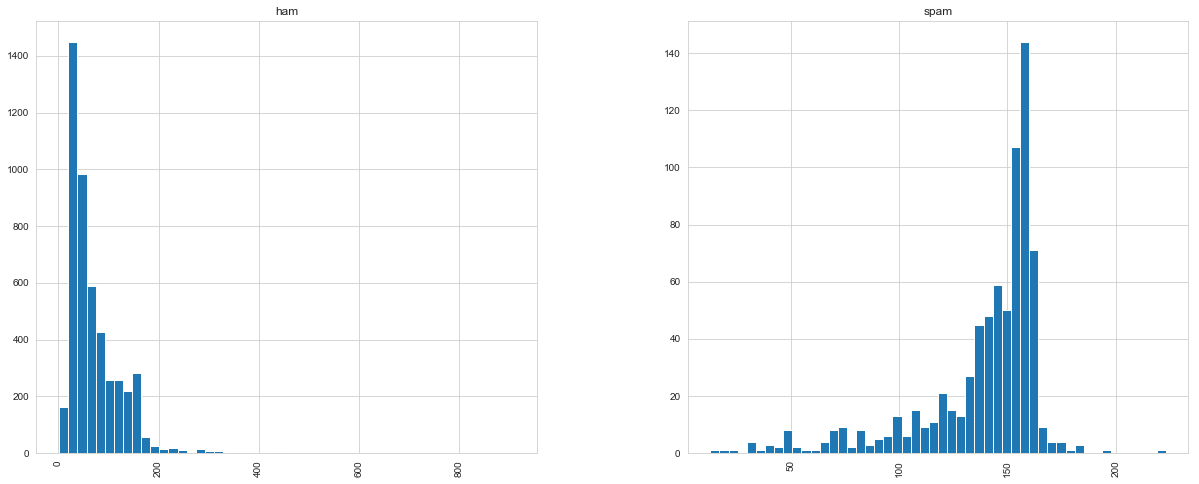

In [29]:
messages.hist(column='length', by='label', bins=50,figsize=(20,8))

There is a trend that spam messages tend to have more characters. so lenght of text must be an important aspect to filter the spam sms

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The algorithms will need some sort of numerical feature vector in order to perform the classification task. Though many methods are available to convert a text/string into a vector, the simplest is the the **bag-of-words** approach, where each unique word in a text will be represented by one number.

 - we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).
 - Create a function that will split a message into its individual words and return a list. We'll also remove common words, ('the', 'a', etc). To do this we will use the NLTK library. It's Useful for processing text and has a lot of useful features.

In [35]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]
nopunc
# Join the characters again to form the string.
#nopunc = ''.join(nopunc)

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [38]:
# Join the characters again to form the string. The Punctuation is now replaced with a space''. 
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] 

# A list of stopwords in English language 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [32]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [40]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

We removed the stopwords.

 - Apply the function to our DataFrame.
  1. Remove all punctuation
  2. Remove all stopwords
  3. Returns a list of the cleaned text

In [48]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [49]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Tokenization

Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).



In [50]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Vectorization
Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models to work.
1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new **bow_transformer:**

In [55]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [56]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


There are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once.

In [59]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.

In [60]:
messages_bow = bow_transformer.transform(messages['message'])

In [61]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's **TfidfTransformer**.

### What is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*. tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


check what is the IDF (inverse document frequency) of the word **"u"** and of word **"university"**? 

In [64]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [70]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


## Training a model

We use scikit-learn here by choosing the Naive Bayes classifier.

In [68]:
from sklearn.naive_bayes import MultinomialNB


In [71]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

classifying our single random message and checking how this performs:

In [72]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham



## Train Test Split

Now we determine how well our model will do overall on the entire dataset.

In [73]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [76]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


The test size is default 30% of the entire dataset (1672 messages out of total 5572), and the training is the rest (3900 out of 5572).

## Creating a Data Pipeline
This will allow us to set up all the transformations that we will do to the data for future use. This saves time by not repeating the previous steps again.

In [78]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


Now we can directly pass message text data and the pipeline will do the pre-processing.

In [79]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a2a32cf28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [80]:
predictions = pipeline.predict(msg_test)

In [81]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1515
        spam       0.69      1.00      0.82       157

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



We have a good score in overall Precision and recall score as well.

 - We can change the classifier method from Naive Bayes to Random forest as well. 

In [89]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier())
    ])
    

In [94]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a2a32cf28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [91]:
predictions = pipeline.predict(msg_test)

In [92]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1501
        spam       0.75      1.00      0.86       171

   micro avg       0.97      0.97      0.97      1672
   macro avg       0.88      0.98      0.92      1672
weighted avg       0.97      0.97      0.97      1672



 - The Random Forest Classifier shows a little change over the Naive Bayes model.